### 장애인 차량등록증 crop image

- CNN 추가하는 경우 이미지 경로 참고 필요

In [1]:
import os
import pandas as pd
from glob import glob

# detect 하위 dir 경로 및 해당 dir name (concat)
subfolders = pd.DataFrame([ f.path for f in os.scandir('/home/lab34/yolov5/runs/detect/') if f.is_dir() ], columns = ['dir_path'])
subfolders_nm = pd.DataFrame([ f.name for f in os.scandir('/home/lab34/yolov5/runs/detect/') if f.is_dir() ], columns = ['dir_name'])
subfolders_frm = pd.concat([subfolders, subfolders_nm], axis=1)

# checkpoints dir 제거(사용할 최종 data) : sub_exp_frm
sub_exp_frm = subfolders_frm.loc[~subfolders_frm.dir_name.str.contains('check'),:]

# exp 뒤의 숫자가 가장 큰 dir 찾기 (가장 최신 detection) : new_dir
new_idx = sub_exp_frm.dir_name.str[3:].replace('',0).astype(int).argmax() # 해당 dir 있는 index number
new_dir = sub_exp_frm.iloc[new_idx, 0]

if 'crops' in os.listdir(new_dir) :
    for (path, dir, files) in os.walk(new_dir + '/crops/') :
        for filename in files :
            ext = os.path.splitext(filename)[-1]
            if ext == '.jpg' :
                label_nm = path.split('/')[-1]
                crop_img_path = '%s/%s'% (path, filename)
                print(label_nm)
                print(crop_img_path)
else :
    print("No crop image")

disable1
/home/lab34/yolov5/runs/detect/exp7/crops/disable1/spin(68).jpg


### 번호판 crop image

- detect 후 save path check & setting
- 요청) 크롭된 이미지 license_plate_raw_data 로 경로 세팅

In [11]:
import os
import pandas as pd
from glob import glob

# detect 하위 dir 경로 및 해당 dir name (concat)
subfolders = pd.DataFrame([ f.path for f in os.scandir('/home/lab34/yolov5_license_plate/runs/detect/') if f.is_dir() ], columns = ['dir_path'])
subfolders_nm = pd.DataFrame([ f.name for f in os.scandir('/home/lab34/yolov5_license_plate/runs/detect/') if f.is_dir() ], columns = ['dir_name'])
subfolders_frm = pd.concat([subfolders, subfolders_nm], axis=1)

# checkpoints dir 제거(사용할 최종 data) : sub_exp_frm
sub_exp_frm = subfolders_frm.loc[~subfolders_frm.dir_name.str.contains('check'),:]

# exp 뒤의 숫자가 가장 큰 dir 찾기 (가장 최신 detection) : new_dir
new_idx = sub_exp_frm.dir_name.str[3:].replace('',0).astype(int).argmax() # 해당 dir 있는 index number
new_dir = sub_exp_frm.iloc[new_idx, 0]

if 'crops' in os.listdir(new_dir) :
    for (path, dir, files) in os.walk(new_dir + '/crops/') :
        for filename in files :
            ext = os.path.splitext(filename)[-1]
           d

old
/home/lab34/yolov5_license_plate/runs/detect/exp10/crops/old/car(36).jpg


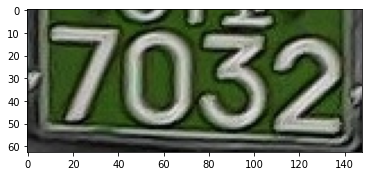

In [13]:
import matplotlib.pyplot as plt
import cv2
img = cv2.imread('/home/lab34/yolov5_license_plate/runs/detect/exp10/crops/old/car(36).jpg')
plt.imshow(img)